### 분석 목적

이번 분석 목적은 단순히 어떤 날에 생일이 제일 많은 지 알아보는 분석이다.

#### 데이터 수집 경로

대부분의 데이터는 하루치로 수치가 나오는 것이 아닌 Monthly로 데이터를 제공하기에 구글링을 하여 아래의 사이트를 통해 데이터를 제공받아 분석을 진행하였다. 아래의 데이터는 2000년부터 2014년의 출생 기록으로 미국 사회보장국에서 제공된 데이터이다.

https://github.com/fivethirtyeight/data/tree/master/births - SSA 데이터

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir(r"C:\Users\USER\Desktop\Data")

In [32]:
df = pd.read_csv("US_births.csv")

In [33]:
df

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558
...,...,...,...,...,...
5474,2014,12,27,6,8656
5475,2014,12,28,7,7724
5476,2014,12,29,1,12811
5477,2014,12,30,2,13634


In [3]:
# 칼럼 rename 및 제외
df = df[['year','month','date_of_month','births']]  # 불필요한 칼럼 제외
df.columns = ['year','month','date','births']

df = df.astype('int')

### 년도 별로 파악하기

2000년, 2004년, 2009년, 2014년도 생일 빈도수를 알아보자

In [4]:
## 년도 별로 파악하기
# year = 2000
df_2000 = df[df['year'] == 2000]

df_2000.sort_values('births', ascending=False)

,year,month,date,births
325,2000,11,21,13991
249,2000,9,6,13917
362,2000,12,28,13900
187,2000,7,6,13853
262,2000,9,19,13850
...,...,...,...,...
134,2000,5,14,7617
92,2000,4,2,7540
113,2000,4,23,7483
358,2000,12,24,6971


- 출생이 많은 날 Top 5

11월 21일 > 9월 6일 > 12월 28일 > 7월 6일 > 9월 19일 순으로 나타남

- 출생이 적은 날 top 5

12월 25일 > 12월 24일 > 4월 23일 > 4월 2일 > 5월 14일 순으로 나타남

In [5]:
df_2000 = df_2000.pivot('date','month','births')

# Nan 값 0으로 대체
df_2000 = df_2000.fillna(0)

# float -> int로 대체
df_2000 = df_2000.astype('int')

In [6]:
df_2000

month,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
1,9083,12614,12672,8388,11621,13363,9376,13356,13145,8453,12927,12545
2,8006,12465,12524,7540,12934,12695,8100,12835,9265,12223,13066,8914
3,11363,12062,12390,11397,12259,8940,11345,13092,8248,13245,12630,7930
4,13032,12035,9054,12797,12434,7983,9550,12940,8603,13154,9084,11501
5,12558,8624,7734,12209,12539,11647,12346,9398,12200,13288,8078,12997
6,12466,7862,11375,12192,8814,12765,13853,8350,13917,12774,11862,12697
7,12516,11630,12420,12213,7797,12474,13658,11864,13512,9131,12822,12820
8,8934,12879,12338,8743,11604,12751,9631,13693,13487,8119,12829,12548
9,7949,12315,12615,7759,12744,12504,8586,13170,9860,11343,12778,8853


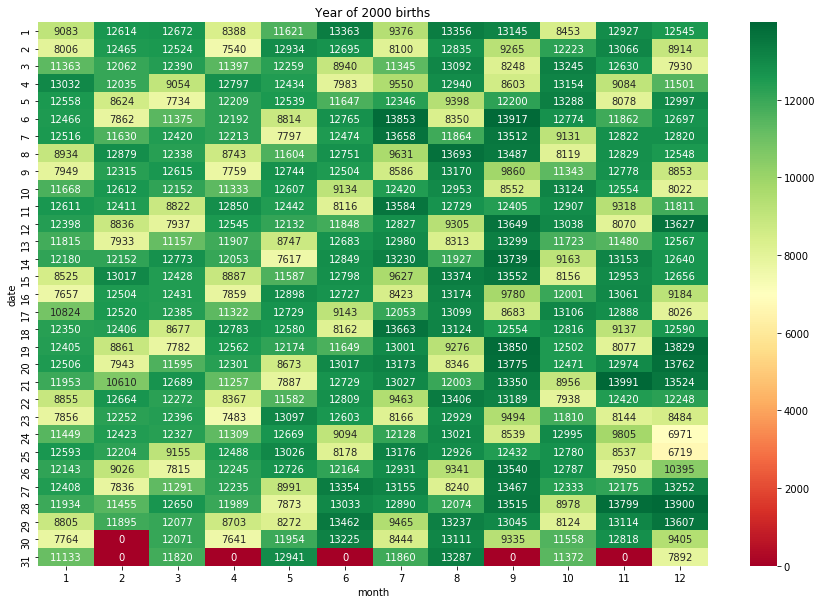

In [7]:
## seaborn heatmap
plt.figure(figsize=(15,10))
ax = sns.heatmap(df_2000, annot=True, fmt='d', cmap='RdYlGn')
plt.title('Year of 2000 births')
plt.show()

In [8]:
def yearly_births(df,year_num):
    df = df[df['year'] == year_num]
    df = df.sort_values('births', ascending=False) # 최대값, 최소값 확인
    
    df_pivot = df.pivot('date','month','births')
    df_pivot = df_pivot.fillna(0)
    df_pivot = df_pivot.astype('int')
    
    return df, df_pivot

In [9]:
df_2004 = yearly_births(df, 2004)

df_2004[0]

,year,month,date,births
1713,2004,9,9,14526
1649,2004,7,7,14496
1712,2004,9,8,14492
1816,2004,12,21,14390
1788,2004,11,23,14238
...,...,...,...,...
1520,2004,2,29,7301
1492,2004,2,1,7270
1821,2004,12,26,7087
1562,2004,4,11,6969


In [10]:
df_2004[1]

month,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
1,8205,7270,12017,12138,8259,12440,13887,7837,13418,13256,12173,13385
2,10586,11686,12943,12776,7433,13785,13271,12428,13539,8886,13212,12989
3,8337,13211,12696,8479,11839,13644,8900,13249,13245,7719,13004,12604
4,7359,12580,12611,7559,12824,13059,7820,13498,8881,12591,13075,8616
5,11489,12572,12407,12013,12852,8706,8978,13234,7875,13707,12900,7606
6,12755,12371,8532,13122,12707,7451,13221,12935,8281,13317,8789,12054
7,12716,8533,7304,12929,12582,12173,14496,8860,12884,13383,7734,13372
8,12781,7440,11816,12836,8599,13339,14056,7773,14492,13122,12420,13179
9,12469,11654,12988,11695,7380,12806,13874,12310,14526,8716,13351,12872


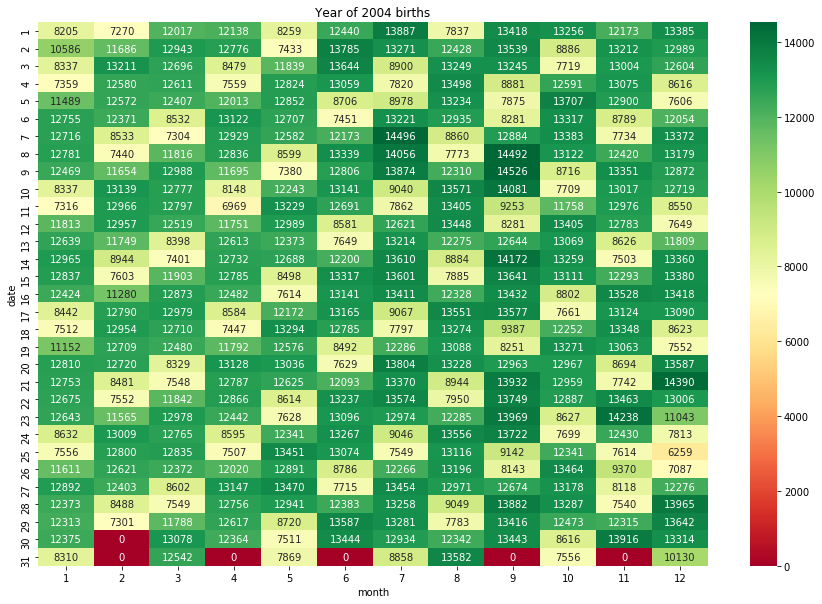

In [11]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(df_2004[1], annot=True, fmt='d', cmap='RdYlGn')
plt.title('Year of 2004 births')
plt.show()

In [12]:
df_2009 = yearly_births(df, 2009)

df_2009[0]

,year,month,date,births
3539,2009,9,9,16081
3540,2009,9,10,14887
3650,2009,12,29,14600
3545,2009,9,15,14558
3434,2009,5,27,14350
...,...,...,...,...
3627,2009,12,6,7103
3634,2009,12,13,7027
3617,2009,11,26,6864
3389,2009,4,12,6864


In [13]:
df_2009[1]

month,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
1,8145,7255,7342,12247,12930,12541,14311,8684,14107,13628,7519,13900
2,10995,12525,12276,13233,8169,13408,13931,7492,13659,13264,12212,13267
3,8338,13330,13265,13078,7220,13080,10630,12642,13900,8548,13205,12952
4,7283,12894,12903,8389,12126,13036,7978,13937,13622,7443,12743,12131
5,12125,12817,13176,7238,13358,12648,7333,13510,8959,12559,12805,7855
6,13222,12517,13081,12200,12686,8428,12415,13377,7587,13674,12314,7103
7,13119,8451,8556,13589,13088,7221,14208,13122,7947,13078,8044,11732
8,13019,7462,7314,13177,12738,12472,14252,8830,13555,13174,7260,12823
9,12647,12484,12400,13278,8180,13368,13566,7683,16081,12706,11874,12497


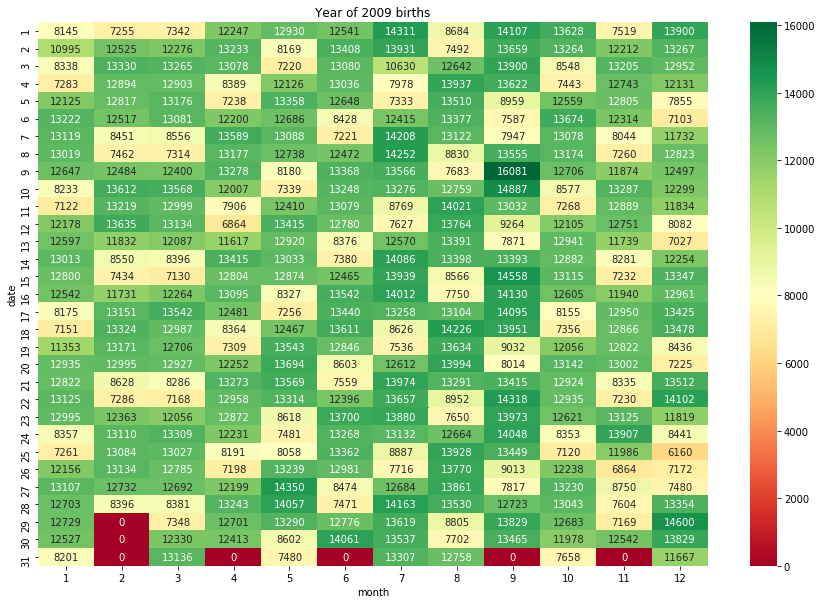

In [14]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(df_2009[1], annot=True, fmt='d', cmap='RdYlGn')
plt.title('Year of 2009 births')
plt.show()

In [15]:
df_2014 = yearly_births(df, 2014)

df_2014[0]

,year,month,date,births
5359,2014,9,3,13863
5372,2014,9,16,13661
5477,2014,12,30,13634
5365,2014,9,9,13629
5295,2014,7,1,13575
...,...,...,...,...
5188,2014,3,16,6973
5132,2014,1,19,6924
5223,2014,4,20,6877
5181,2014,3,9,6789


In [16]:
df_2014[1]

month,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
1,8018,8206,8186,11710,12412,7474,13575,12782,8043,13082,8367,12584
2,11171,7265,7267,12003,12011,11885,13183,8814,13071,12841,7736,13083
3,12317,11825,11793,11984,8015,12246,13043,7679,13863,12539,12309,12427
4,8199,12519,12065,12319,7171,12320,9278,12511,13556,8425,12748,12384
5,7174,11914,12129,7926,11788,12256,7778,13415,13457,7484,12461,11964
6,11400,11807,12069,7127,12487,11965,7568,12900,8806,11893,12489,8280
7,12310,12246,12035,11508,12127,8164,13038,13152,7770,12860,12422,7196
8,11829,8129,8140,12187,12166,7359,13500,12887,12743,12363,8268,11773
9,11827,7060,6789,11875,11949,11886,12577,8958,13629,12130,7479,12419


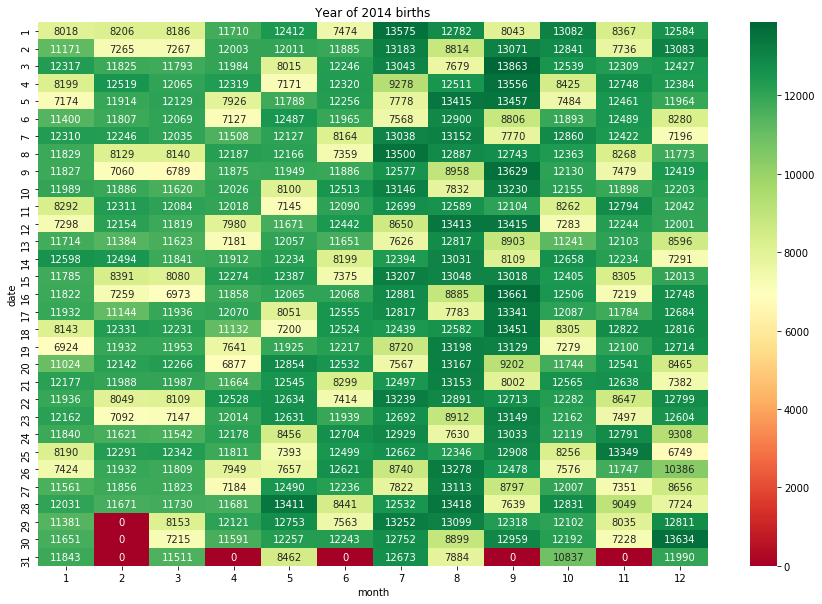

In [17]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(df_2014[1], annot=True, fmt='d', cmap='RdYlGn')
plt.title('Year of 2014 births')
plt.show()

### 년도를 통합해서 알아보자


In [19]:
total_df = df.pivot_table(values='births',index='date',columns='month',aggfunc=sum)
# Nan 값 0으로 대체
total_df = total_df.fillna(0)

# float -> int로 대체
total_df = total_df.astype('int')

In [20]:
total_df

month,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
1,116030,169444,171698,154737,169438,171348,177820,183254,163979,179334,176290,170255
2,144083,166066,164841,168693,171861,171526,180817,178928,165886,178548,170473,168725
3,170115,163254,166872,168316,168072,168576,175346,173219,167330,181481,168772,171088
4,171663,166661,164685,174347,162243,171559,132229,174071,172536,177327,167638,169826
5,166682,163391,167257,168654,166073,171822,161091,174444,178833,172521,171722,173695
6,164167,166125,167603,162287,163325,173566,176278,177008,175863,170513,171454,169540
7,167622,173627,171634,163074,166789,172165,183246,178909,176509,169674,175619,164548
8,163078,170915,169037,163080,168607,168962,179420,186328,181846,172969,172970,164440
9,163838,164291,164696,165299,170670,167096,180238,181514,184662,171801,167177,163318


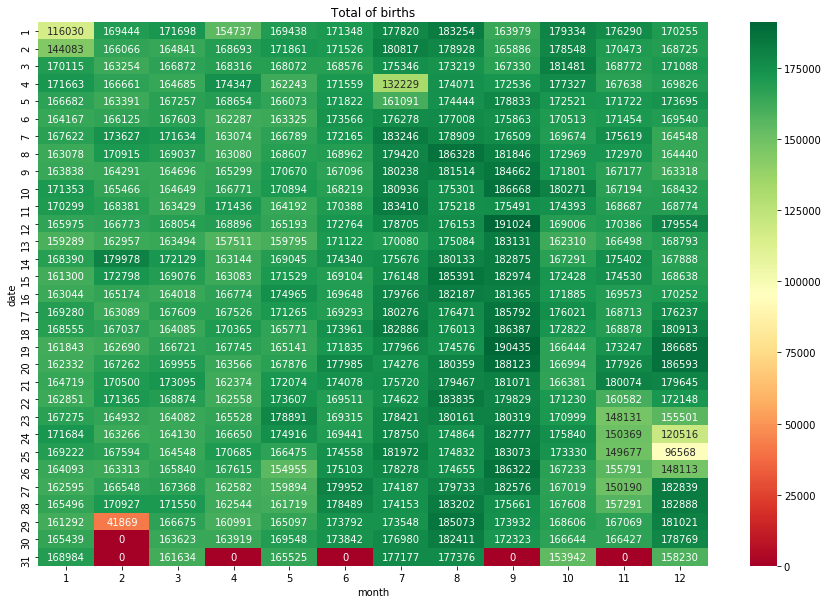

In [21]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(total_df, annot=True, fmt='d', cmap='RdYlGn')
plt.title('Total of births')
plt.show()

### 일별로 랭크를 매겨 순위를 알아보자

In [22]:
group_df = df.groupby(by=['month','date'])['births'].sum()

In [23]:
group_df = pd.DataFrame(group_df)

In [24]:
group_df = group_df.sort_values('births', ascending=False)

In [25]:
rank = []
for i in range(1,len(group_df)+1):
    rank.append(i)
    


In [26]:
group_df['rank'] = rank

In [27]:
group_df

births  rank
month date              
9     12    191024     1
      19    190435     2
      20    188123     3
12    19    186685     4
9     10    186668     5
...            ...   ...
7     4     132229   362
12    24    120516   363
1     1     116030   364
12    25     96568   365
2     29     41869   366

[366 rows x 2 columns]

In [28]:
group_df = group_df.pivot_table(values='rank',index='date',columns='month')

group_df = group_df.fillna(0)

group_df = group_df.astype('int')

In [29]:
group_df

month,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
1,364,192,150,354,194,162,72,16,305,57,80,180
2,361,273,289,214,145,157,39,58,275,65,175,212
3,182,317,254,225,227,220,95,129,241,33,211,166
4,152,262,292,111,336,154,362,117,136,74,232,185
5,260,312,245,216,272,147,342,109,61,137,149,122
6,299,271,237,335,313,125,81,76,87,173,158,190
7,233,123,153,323,255,140,17,59,78,186,92,294
8,322,169,202,321,218,205,56,8,31,132,131,296
9,307,297,291,283,172,249,44,32,13,148,248,314


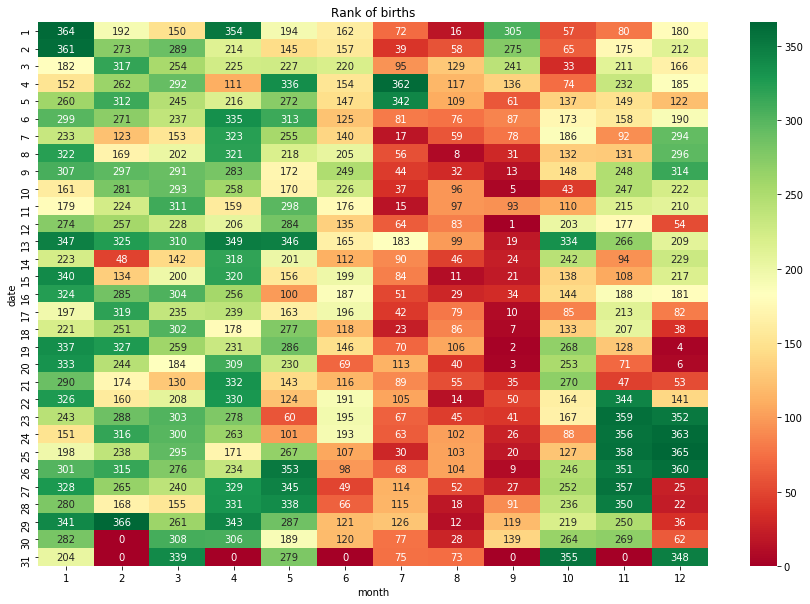

In [31]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(group_df, annot=True, fmt='d', cmap='RdYlGn')
plt.title('Rank of births')
plt.show()